# Evaluation
I make graphs for each model and calculate RMSE to evaluate model performance.

### Import Packages

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from train_test import train_test
from GRU_model import GRU_model
from actual_pred_plot import actual_pred_plot

### Load Data

In [2]:
with open(
    '../data/final/artists_dict.pickle', 'rb') as artists, open(
    '../data/final/rank_df.pickle', 'rb') as rank:
    artists_dict = pickle.load(artists)
    rank_df = pickle.load(rank)
    artists.close()
    rank.close()

### Plot Graph (head)

2022-06-01 16:30:33.288243: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-01 16:30:33.288329: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


2022-06-01 16:30:33.863904: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-01 16:30:34.055336: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 16:30:34.131040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 16:30:34.170456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 16:30:35.073100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 16:30:35.124601: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 16:30:35.149074: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113

2022-06-01 16:30:36.923200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 16:30:36.974692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 16:30:36.997929: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2022-06-01 16:30:37.474087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 16:30:37.525454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 16:30:37.548904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 16:30:38.142913: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 16:30:38.194984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 16:30:38.217000: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 16:30:38.669509: I tensorflow/core/grappler/optimizers/cust

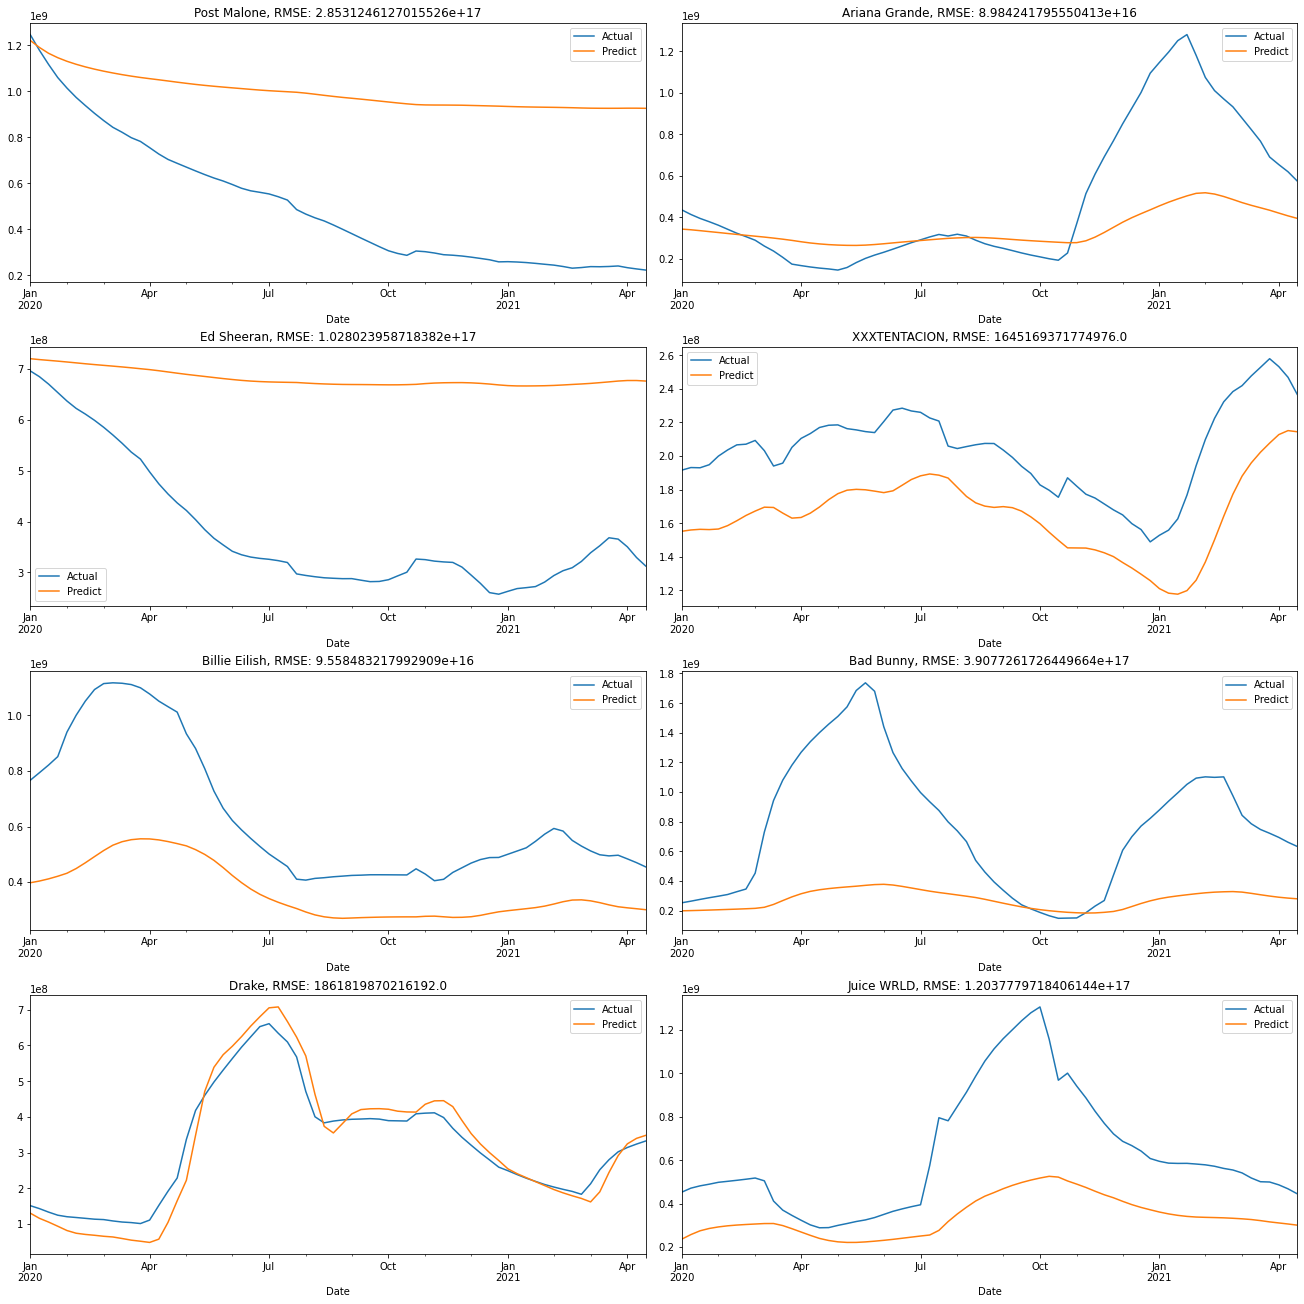

In [3]:
model = Sequential()
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(18,18), constrained_layout=True)
for i, artist in zip(range(8), rank_df.index[:8]):
    df = artists_dict[artist].resample('W').mean().dropna()
    r = i%4
    c = i//4
    model = load_model('../models/{}.h5'.format(artist))
    X_train, y_train, X_test, sc = train_test(df, 5, 13)
    pred = sc.inverse_transform(model.predict(X_test))
    rmse, actual_pred = actual_pred_plot(df, pred)
    actual_pred.plot(ax=ax[r][c], title='{}, RMSE: {}'.format(artist, round(rmse, 0)));

### Plot Graph (middle)

2022-06-01 16:30:39.766120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 16:30:39.818067: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 16:30:39.840346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 16:30:40.290850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 16:30:40.342542: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 16:30:40.366726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 16:30:40.921785: I tensorflow/core/grappler/optimizers/cust

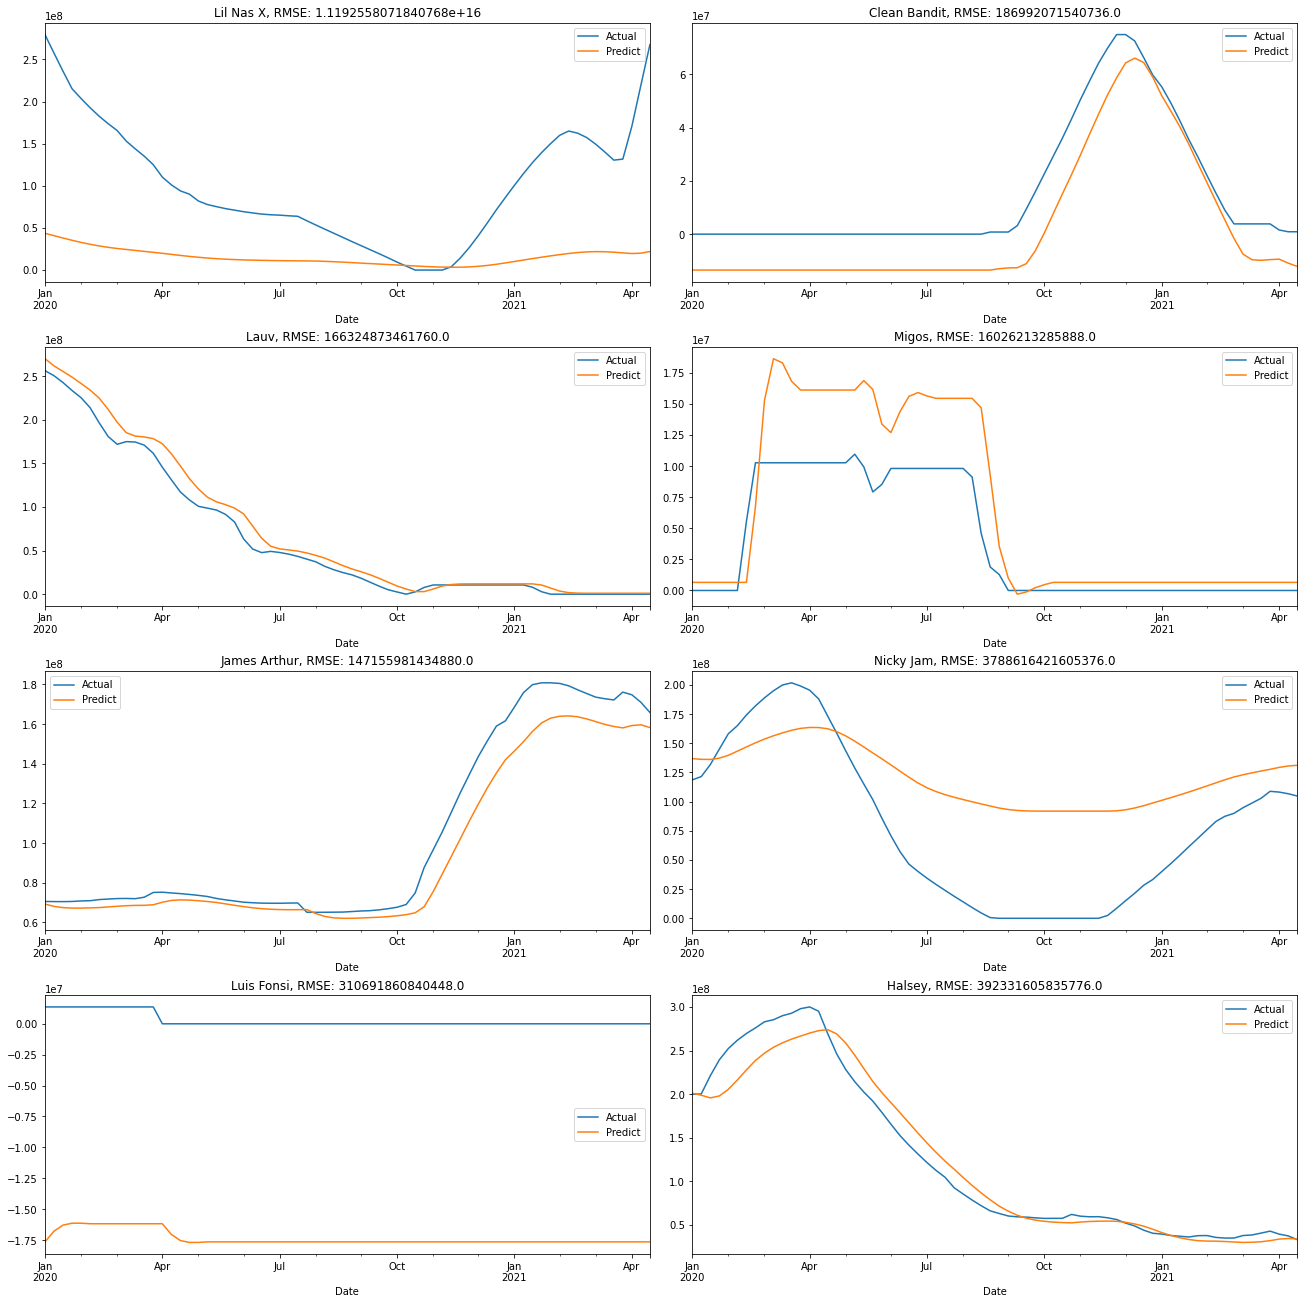

In [4]:
model = Sequential()
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(18,18), constrained_layout=True)
for i, artist in zip(range(8), rank_df.index[40:50]):
    df = artists_dict[artist].resample('W').mean().dropna()
    r = i%4
    c = i//4
    model = load_model('../models/{}.h5'.format(artist))
    X_train, y_train, X_test, sc = train_test(df, 5, 13)
    pred = sc.inverse_transform(model.predict(X_test))
    rmse, actual_pred = actual_pred_plot(df, pred)
    actual_pred.plot(ax=ax[r][c], title='{}, RMSE: {}'.format(artist, round(rmse, 0)));

### Plot Graph (tail)

2022-06-01 16:30:44.928362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 16:30:44.979736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 16:30:45.003060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 16:30:45.546826: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 16:30:45.598186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 16:30:45.621752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-01 16:30:46.072543: I tensorflow/core/grappler/optimizers/cust

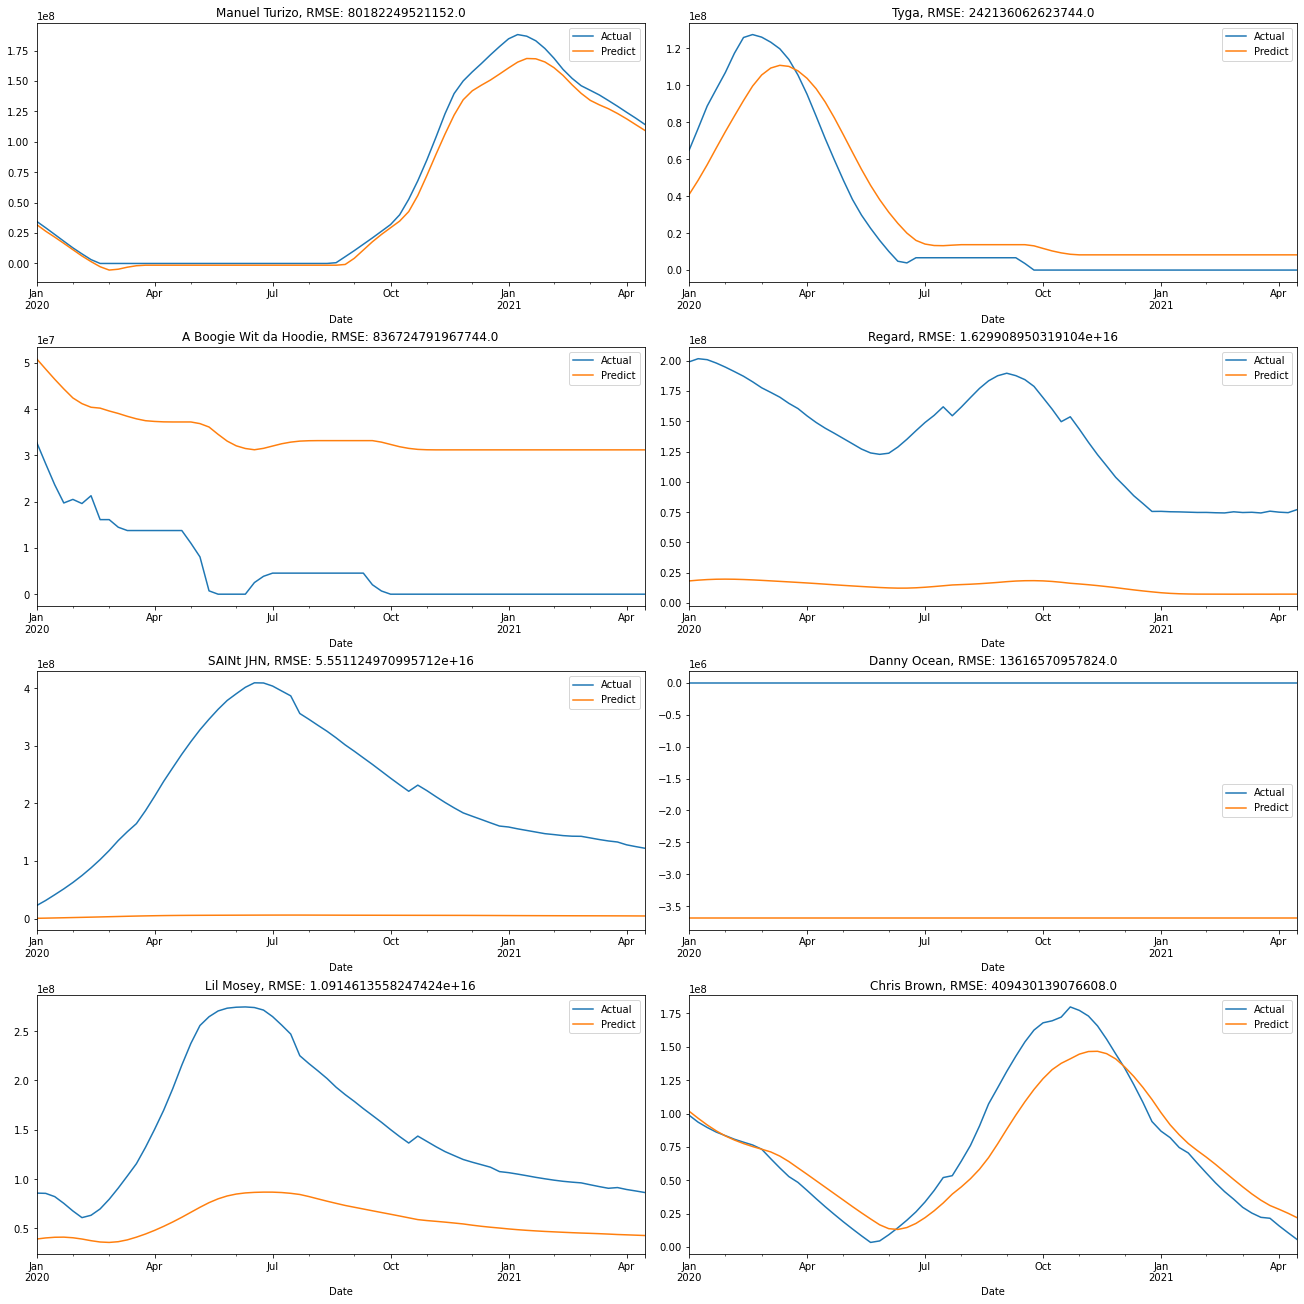

In [5]:
model = Sequential()
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(18,18), constrained_layout=True)
for i, artist in zip(range(8), rank_df.index[-8:]):
    df = artists_dict[artist].resample('W').mean().dropna()
    r = i%4
    c = i//4
    model = load_model('../models/{}.h5'.format(artist))
    X_train, y_train, X_test, sc = train_test(df, 5, 13)
    pred = sc.inverse_transform(model.predict(X_test))
    rmse, actual_pred = actual_pred_plot(df, pred)
    actual_pred.plot(ax=ax[r][c], title='{}, RMSE: {}'.format(artist, round(rmse, 0)));